# Predicting severity of breast cancer using machine learning model

This notebook looks into various python based machine learning and data science libraries in attempt to build machine learning model capable of predicting severity of the breast cancer whether it is malignant or benign.

We're going to take the following approach:

1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimetation

## 1. Problem Defination

in a statement,
> Given clinical parameter about a patient, can we predict whether the breast cancer is malignant or benign?

## 2. Data

The original data came from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original))

There is a also version available at [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## 3. Evaluation
(what define success?)
> If we can reach 95% accuracy at predicting whether the breast cancer is malignant or benign during the proof of concept, we'll persue the project

## 4. Features

**Data Dictionary**

1. id - ID number
2. diagnosis - The diagnosis of breast tissues (M = malignant, B = benign)
3. radius_mean - mean of distances from center to points on the perimeter
4. texture_mean - standard deviation of gray-scale values
5. perimeter_mean - mean size of the core tumor
6. area_mean
7. smoothness_mean - mean of local variation in radius lengths
8. compactness_mean - mean of perimeter^2 / area - 1.0
9. concavity_mean - mean of severity of concave portions of the contour
10. concave points_mean - mean for number of concave portions of the contour
11. symmetry_mean
12. fractal_dimension_mean - mean for "coastline approximation" - 1
13. radius_se - standard error for the mean of distances from center to points on the perimeter
14. texture_se - standard error for standard deviation of gray-scale values
15. perimeter_se
16. area_se
17. smoothness_se - standard error for local variation in radius lengths
18. compactness_se - standard error for perimeter^2 / area - 1.0
19. concavity_se - standard error for severity of concave portions of the contour
20. concave points_se- standard error for number of concave portions of the contour
21. symmetry_se
22. fractal_dimension_se - standard error for "coastline approximation" - 1
23. radius_worst - "worst" or largest mean value for mean of distances from center to points on the perimeter
24. texture_worst - "worst" or largest mean value for standard deviation of gray-scale values
25. perimeter_worst
26. area_worst
27. smoothness_worst - "worst" or largest mean value for local variation in radius lengths
28. compactness_worst - "worst" or largest mean value for perimeter^2 / area - 1.0
29. concavity_worst - "worst" or largest mean value for severity of concave portions of the contour
30. concave points_worst - "worst" or largest mean value for number of concave portions of the contour
31. symmetry_worst
32. fractal_dimension_worst - "worst" or largest mean value for "coastline approximation" - 1

## Preparing Tools

we're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [90]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [91]:
breast_cancer = pd.read_csv('data.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [92]:
breast_cancer.shape

(569, 33)

In [99]:
breast_cancer['diagnosis'].replace(['M'],1,inplace=True)
breast_cancer['diagnosis'].replace(['B'],0,inplace=True)
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].astype('int')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Exploration (Exploratory Data Analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset your working with

1. What question(s) are you trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [100]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [101]:
breast_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [102]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [103]:
breast_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [104]:
# Let's remove NaN values
breast_cancer.drop('Unnamed: 32',axis=1,inplace=True)
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [105]:
breast_cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

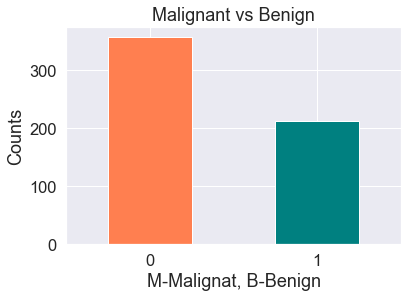

In [107]:
breast_cancer['diagnosis'].value_counts().plot(kind='bar',
                                               color=['coral','teal']);

plt.xlabel('M-Malignat, B-Benign')
plt.ylabel('Counts')
plt.title('Malignant vs Benign')
plt.xticks(rotation=0);

In [108]:
breast_cancer.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Confusion Matrix

In [109]:
# Putting diagnosis (truth label) at last
temp = breast_cancer['diagnosis']
breast_cancer.drop('diagnosis',axis=1,inplace=True)
breast_cancer['diagnosis'] = temp

In [110]:
breast_cancer.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [111]:
breast_cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


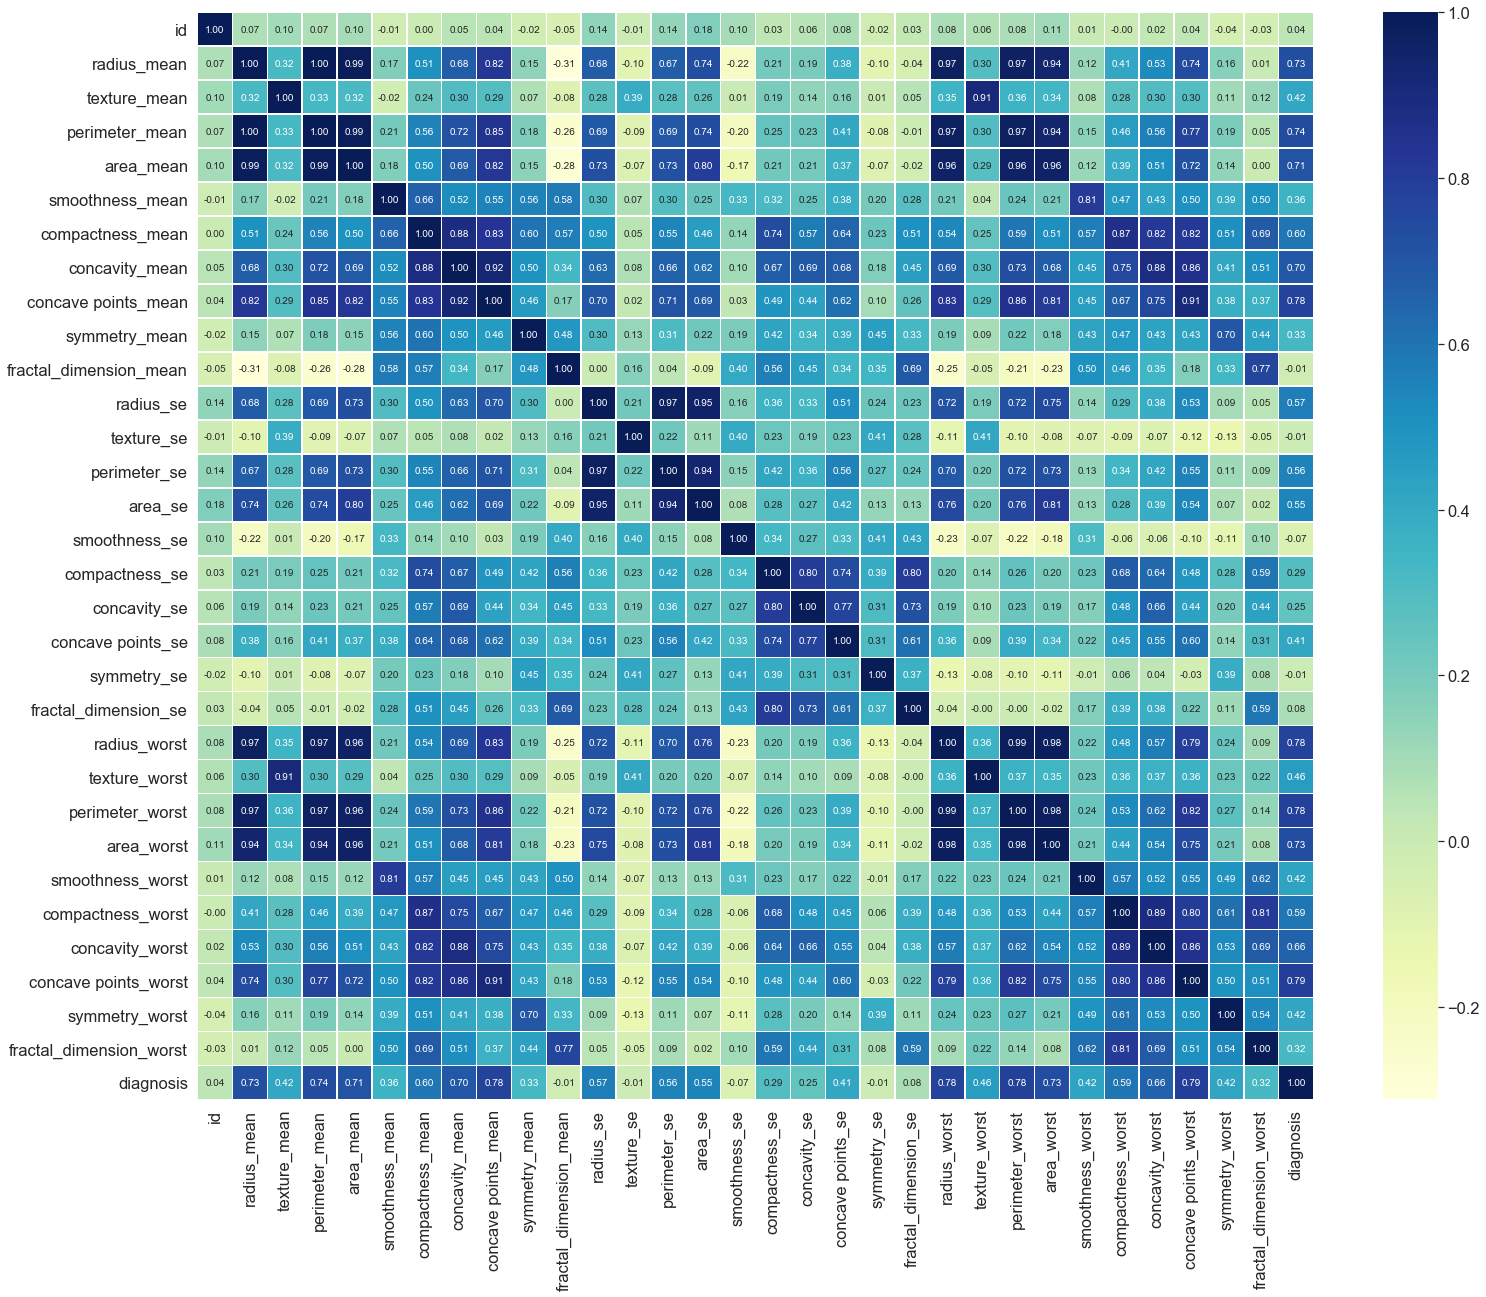

In [112]:
# Let's make our correlartion matix little prettier
corr_matrix = breast_cancer.corr()
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='0.2f',
                 cmap='YlGnBu')

## Modelling

In [113]:
# Split into X & y
X = breast_cancer.drop('diagnosis',axis=1)
y = breast_cancer['diagnosis']

In [114]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [116]:
# Now Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [117]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
72,859717,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,...,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.65660,0.18990,0.3313,0.13390
536,91979701,14.27,22.55,93.77,629.8,0.10380,0.11540,0.146300,0.061390,0.1926,...,15.29,34.27,104.30,728.3,0.1380,0.2733,0.42340,0.13620,0.2698,0.08351
415,905686,11.89,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,...,13.05,27.21,85.09,522.9,0.1426,0.2187,0.11640,0.08263,0.3075,0.07351
420,906539,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
331,896864,12.98,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,...,14.42,21.95,99.21,634.3,0.1288,0.3253,0.34390,0.09858,0.3596,0.09166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,874158,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,...,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
167,8712729,16.78,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.065760,0.1893,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.23180,0.14740,0.2810,0.07228
80,861103,11.45,20.97,73.81,401.5,0.11020,0.09362,0.045910,0.022330,0.1842,...,13.11,32.16,84.53,525.1,0.1557,0.1676,0.17550,0.06127,0.2762,0.08851
436,908916,12.87,19.54,82.67,509.2,0.09136,0.07883,0.017970,0.020900,0.1861,...,14.45,24.38,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735


In [118]:
y_train

72     1
536    1
415    0
420    0
331    0
      ..
185    0
167    1
80     0
436    0
161    1
Name: diagnosis, Length: 455, dtype: int32

Now we've got our data split into training and test sets, it's time to build machine learning model

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

**We are going to try 3 different machine learning models:**
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest

In [119]:
# Put the models in the dictionary
models = {'Logistic Regression': LogisticRegression(),
          'K-Neighbours': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning model
    models : dict of models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    '''
    # Setup a random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for model_name,model in models.items():
        # Fit the model to data
        model.fit(X_train, y_train)
        
        # Evaluate the model on test data
        # and append its score to model_scores
        model_scores[model_name] = model.score(X_test, y_test)
        
    return model_scores

In [120]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.6403508771929824,
 'K-Neighbours': 0.7368421052631579,
 'Random Forest': 0.9649122807017544}

### Model Comparison

In [121]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,K-Neighbours,Random Forest
accuracy,0.640351,0.736842,0.964912


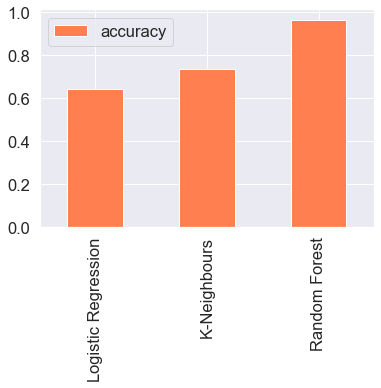

In [122]:
model_compare.T.plot(kind='bar',color='coral');

Now we've got baseline model and we know model's first predictions aren't always what we should based our next step off. What should we do?

Let's look at following
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC curve
* Area under the curve (AUC)


### Hyperparameter tunning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [123]:
# Create a hyperparameter grid for KNN
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
knn_grid = {'leaf_size':leaf_size,
            'n_neighbors':n_neighbors,
             'p':p}


# Create a hyperparameter grid for RandomForestClassifier
# n_estimators - number of trees
rfc_grid = {'n_estimators':np.arange(10,1000,50),
            'max_depth': [None,3,5,10],
            'min_samples_split': np.arange(2,20,2),
            'min_samples_leaf': np.arange(1,20,2)}


Now we've got hyperparameter grids setup for each of our models, lets tune them using RandomizedSearchCV

In [124]:
# Tune LogisticRegression

# Setup a random seed
np.random.seed(42)

# Set random hyperparameter search for LogisticRegression
rs_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                param_distributions=knn_grid,
                                cv=5,
                                n_iter=25,
                                verbose=True
                                )
# Fit the random hyperparameter search model for KNN
rs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=None,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
     

In [125]:
rs_knn.best_params_

{'p': 1, 'n_neighbors': 3, 'leaf_size': 41}

In [126]:
rs_knn.score(X_test,y_test)

0.7719298245614035

Now we've tuned KNeighborsClassifier(), let's do the same for RandomForestClassifier()

In [127]:
# Tune RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            param_distributions=rfc_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [128]:
rs_rfc.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [129]:
rs_rfc.score(X_test,y_test)

0.9649122807017544

**GridSearchCV**

In [130]:
# Create DIfferent hyperparameter grid for RandomForestClassifier

rfc_grid = {'n_estimators':np.arange(10,700,50),
            'max_depth': [None,5],
            'min_samples_split': np.arange(2,5,2),
            'min_samples_leaf': np.arange(1,5,2)}



# Setup a random seed
np.random.seed(42)

# Setup grid hyperparameter search for RandomForestClassifier
gs_rfc = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=rfc_grid,
                      cv=5,
                      verbose=True,
                  )

# Fit grid hyperparameter search model for RandomForestClassifier
gs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [131]:
gs_rfc.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 260}

In [132]:
gs_rfc.score(X_test,y_test)

0.9649122807017544

## Evaluting our tuned machine learning classifier, beyound accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [133]:
# Make predictions with tuned matrix
y_preds = gs_rfc.predict(X_test)

In [134]:
y_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1])

**AUC-ROC Curve**

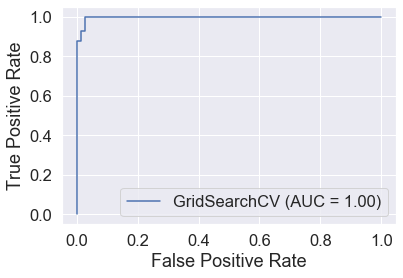

In [135]:
plot_roc_curve(gs_rfc,X_test,y_test)

AUC score is 1.0

**Confusion Matrix**

In [136]:
print(confusion_matrix(y_test, y_preds))

[[72  1]
 [ 3 38]]


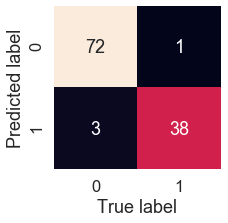

In [137]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''
    Plots nice looking confusion matrix using seaborn
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test,y_preds)

**Classification Report**

In [138]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.97      0.93      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [139]:
gs_rfc.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 260}

In [140]:
model = RandomForestClassifier(max_depth=None,
                               min_samples_leaf=1,
                               min_samples_split=2,
                               n_estimators=40)

In [141]:
# Cross validation accuracy
cv_accuracy = cross_val_score(model, 
                              X,
                              y,
                              cv=5,
                              scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.9578326346840551

In [142]:
# Cross validation precision
cv_precision = cross_val_score(model, 
                              X,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.9570845718948535

In [143]:
# Cross validation recall
cv_recall = cross_val_score(model, 
                              X,
                              y,
                              cv=5,
                              scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9437430786267995

In [144]:
# Cross validation f1-score
cv_f1 = cross_val_score(model, 
                              X,
                              y,
                              cv=5,
                              scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.9429174519211747

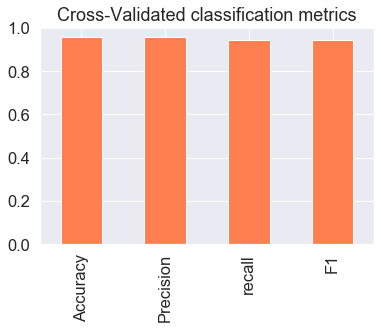

In [157]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({'Accuracy':cv_accuracy,
                           'Precision':cv_precision,
                           'recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])
cv_metrics.T.plot(kind='bar',
                  legend=False,
                  title='Cross-Validated classification metrics',
                  color='coral');

## Feature Importance

In [152]:
model.fit(X_train,y_train)

# Return the feature importances (the higher, the more important the feature)
model.feature_importances_

array([0.00458061, 0.03014921, 0.0262316 , 0.05467645, 0.07486751,
       0.01139134, 0.01404813, 0.03145685, 0.08793562, 0.00528717,
       0.00372227, 0.00500288, 0.00351362, 0.01162708, 0.01481439,
       0.0050121 , 0.00474533, 0.00684697, 0.00323184, 0.00356058,
       0.00568441, 0.07916481, 0.0174686 , 0.17317474, 0.07424428,
       0.01140712, 0.03120742, 0.0542289 , 0.13747181, 0.00672459,
       0.00652178])

In [155]:
# Match feature_importances_ with columns

features_dict = dict(zip(breast_cancer.columns,list(model.feature_importances_)))
features_dict

{'id': 0.004580608373483409,
 'radius_mean': 0.03014920698804057,
 'texture_mean': 0.026231604448906192,
 'perimeter_mean': 0.054676451991556255,
 'area_mean': 0.07486750672745776,
 'smoothness_mean': 0.011391338772337677,
 'compactness_mean': 0.014048131189231008,
 'concavity_mean': 0.03145685450404019,
 'concave points_mean': 0.08793562317868141,
 'symmetry_mean': 0.005287174540896228,
 'fractal_dimension_mean': 0.0037222738393630182,
 'radius_se': 0.00500288079707527,
 'texture_se': 0.0035136169681078905,
 'perimeter_se': 0.011627076361870974,
 'area_se': 0.014814385484609397,
 'smoothness_se': 0.005012098235818038,
 'compactness_se': 0.00474532814157064,
 'concavity_se': 0.006846965105724431,
 'concave points_se': 0.0032318387766311135,
 'symmetry_se': 0.0035605775492905055,
 'fractal_dimension_se': 0.005684405496475127,
 'radius_worst': 0.07916481408707127,
 'texture_worst': 0.017468604991032095,
 'perimeter_worst': 0.17317474184901177,
 'area_worst': 0.07424427789946408,
 'smooth

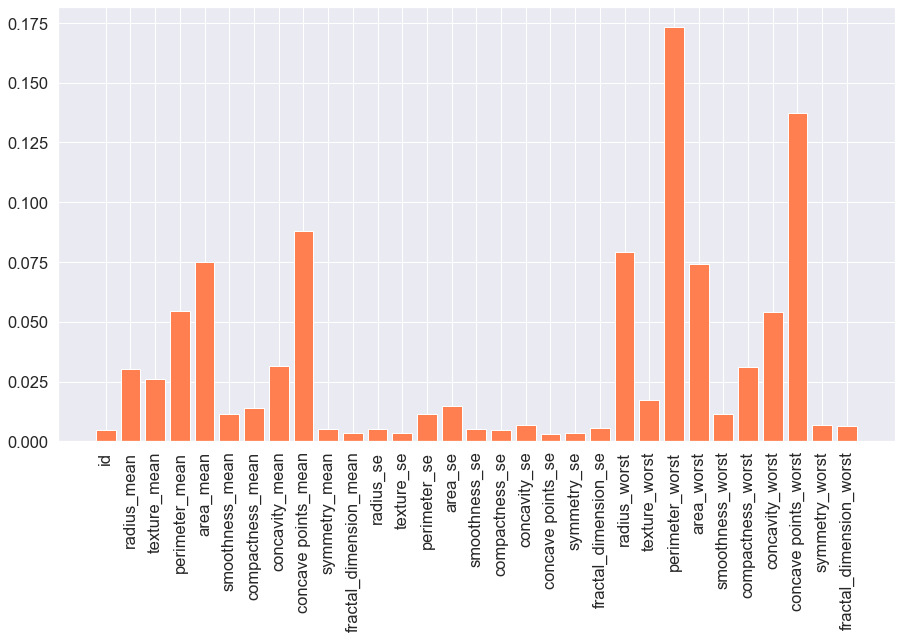

In [167]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict,index=[0])

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(features_dict.keys(), features_dict.values(),color='coral')
plt.xticks(rotation=90);